## CSC 577 - Assignment 2
### Azat Dovgeldiyev

#### Global imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.spatial.distance import cosine, correlation

pd.options.display.float_format='{:,.3f}'.format

#### Import from Surprise

In [2]:
from surprise import Dataset, Reader
from surprise import SVD, KNNWithMeans, SlopeOne
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from surprise import accuracy

#### Import from local module

In [3]:
%load_ext autoreload
%autoreload
from KNNRecommender import pearsonSim, cosineSim, knn_search, knn_predict, test, recommend

In [4]:
### Load the joke ratings matrix into a dataframe

jokeDF=pd.read_csv('http://facweb.cs.depaul.edu/mobasher/classes/csc577/data/Jokes/joke-ratings.csv', header=None)
jokeDF

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,3,19,1,2,3,2,1,15,2,6,...,13,0,0,0,0,0,5,0,0,0
1,15,10,17,15,8,1,10,5,19,20,...,13,6,10,18,10,8,14,11,6,12
2,0,0,0,0,20,20,20,20,0,0,...,0,0,0,20,0,0,0,0,0,0
3,0,19,0,0,12,19,8,17,0,12,...,0,0,0,11,0,0,0,0,0,0
4,19,15,6,5,12,12,18,15,10,16,...,16,16,15,16,16,12,14,17,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,5,16,5,6,8,14,14,4,13,...,6,9,15,7,13,6,13,5,14,13
996,15,11,16,5,7,16,12,2,5,4,...,0,0,0,0,6,0,0,0,0,0
997,16,16,15,7,14,9,14,13,6,11,...,0,0,0,0,0,0,0,0,0,0
998,3,4,3,3,9,7,3,4,3,4,...,3,6,6,3,3,3,3,3,3,3


In [5]:
### Load the joke text data

jokes=pd.read_csv('http://facweb.cs.depaul.edu/mobasher/classes/csc577/data/Jokes/jokes.csv', header=None, dtype=str, index_col=0, names=["Joke Text"])
jokes

,Joke Text
0,"A man visits the doctor. The doctor says ""I ha..."
1,This couple had an excellent relationship goin...
2,Q. What's 200 feet long and has 4 teeth? A. Th...
3,Q. What's the difference between a man and a t...
4,Q. What's O. J. Simpson's Internet address? A....
...,...
95,Two attorneys went into a diner and ordered tw...
96,A teacher is explaining to her class how diffe...
97,Age and Womanhood1. Between the ages of 13 and...
98,A bus station is where a bus stops.A train sta...


In [6]:
### Convert to a Numpy array which is used as input to functions in the KNNRecommender module
jokeMat = np.array(jokeDF)

In [7]:
jokeMat

array([[ 3, 19,  1, ...,  0,  0,  0],
       [15, 10, 17, ..., 11,  6, 12],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [16, 16, 15, ...,  0,  0,  0],
       [ 3,  4,  3, ...,  3,  3,  3],
       [ 9, 11,  9, ...,  0,  0,  0]], dtype=int64)

In [8]:
user1 = jokeMat[0]
user2 = jokeMat[1]

In [9]:
idx, sims = knn_search(user1, jokeMat, metric=pearsonSim)

# Create a dataframe to display most similar users and their similarities to "user"
neighbors1 = pd.DataFrame(idx, columns = ['user1'])
neighbors1['sim'] = sims[idx]
neighbors1.head(10)

,user1,sim
0,0,1.000
1,755,0.830
2,267,0.830
3,509,0.809
4,982,0.807
5,850,0.802
6,924,0.801
7,593,0.801
8,955,0.791
9,470,0.788


In [10]:
idx, sims = knn_search(user2, jokeMat, metric=pearsonSim)

# Create a dataframe to display most similar users and their similarities to "user"
neighbors2 = pd.DataFrame(idx, columns = ['user2'])
neighbors2['sim'] = sims[idx]
neighbors2.head(10)

,user2,sim
0,1,1.000
1,173,0.695
2,609,0.686
3,227,0.679
4,170,0.679
5,705,0.669
6,239,0.649
7,13,0.639
8,198,0.638
9,635,0.631


In [11]:
# We could actually extract the top neighbors from the original matrix
print("User:", user1)
print("\nNeighbors:")
jokeDF.iloc[idx].head(4)

User: [ 3 19  1  2  3  2  1 15  2  6  2  4  3 19  3  3  3  1  1  1  1 12  6  1
  2 12 18 13 20  3 13  6  1 18 16 15  1  2  2  2  2  1  1  1  3  4 14 10
 14 15  2  3 14 19  6 11  1  1 13  2 19 14  4  1 13  9  1 19 16  6  0  0
  0  0  0  0  0  1  0  0  0  3  0  0  0  0  0  0  0  0 13  0  0  0  0  0
  5  0  0  0]

Neighbors:


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1,15,10,17,15,8,1,10,5,19,20,...,13,6,10,18,10,8,14,11,6,12
173,0,0,0,0,11,0,9,11,0,0,...,0,0,0,0,0,0,9,0,0,0
609,0,0,0,0,10,0,16,9,0,16,...,0,0,0,0,0,0,0,0,0,0
227,19,16,19,18,15,9,19,19,14,10,...,0,0,0,0,0,0,0,0,0,0


In [12]:
print("User 2:", user2)
print("\nNeighbors:")
jokeDF.iloc[idx].head(4)

User 2: [15 10 17 15  8  1 10  5 19 20 17 19 15 18 15 10 15 10 14  9 11 19 19 20
 11 18 15 11 10 17 17 10 18 20  9 11 18 14 10 18 18  7 19 19  6  7  6 10
  9 14 14 20 11  9  4  7 19  8 11 20  4  7  1 15 15  7 19 12 11 18  6 13
 19 18 18 17 18 19 19 19 14 15 15 17 19 15 10 14 15 11 13  6 10 18 10  8
 14 11  6 12]

Neighbors:


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1,15,10,17,15,8,1,10,5,19,20,...,13,6,10,18,10,8,14,11,6,12
173,0,0,0,0,11,0,9,11,0,0,...,0,0,0,0,0,0,9,0,0,0
609,0,0,0,0,10,0,16,9,0,16,...,0,0,0,0,0,0,0,0,0,0
227,19,16,19,18,15,9,19,19,14,10,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#with Cosine as similarity measures 
idx, sims = knn_search(user1, jokeMat, metric=cosineSim)

# Create a dataframe to display most similar users and their similarities to "user"
cosine_n1 = pd.DataFrame(idx, columns = ['user1'])
cosine_n1['sim'] = sims[idx]
cosine_n1.head(10)

,user1,sim
0,0,1.000
1,699,0.888
2,955,0.884
3,214,0.878
4,755,0.876
5,587,0.876
6,850,0.872
7,362,0.872
8,642,0.870
9,906,0.869


In [14]:
idx, sims = knn_search(user2, jokeMat, metric=cosineSim)

# Create a dataframe to display most similar users and their similarities to "user"
cosine_n2 = pd.DataFrame(idx, columns = ['user2'])
cosine_n2['sim'] = sims[idx]
cosine_n2.head(10)

,user2,sim
0,1,1.000
1,173,0.948
2,609,0.939
3,977,0.938
4,611,0.937
5,284,0.936
6,804,0.936
7,207,0.935
8,680,0.935
9,38,0.935


*********
Similarly, run the "knn_predict" function for at least 2 user-item pairs with k=20 as the number of neighbors and display the predicted ratings in each case.

In [15]:
# Testing knn_predict with default pearsonSim as similarity metric

item = 0 # A man visits the doctor. The doctor says "I ha...
user1 = jokeMat[0]
k = 20
rating = knn_predict(user1, item, jokeMat, k)

print("\nPredicted Rating for User:", user1, "on item ", jokeDF.columns[item],":")
print(rating)


Predicted Rating for User: [ 3 19  1  2  3  2  1 15  2  6  2  4  3 19  3  3  3  1  1  1  1 12  6  1
  2 12 18 13 20  3 13  6  1 18 16 15  1  2  2  2  2  1  1  1  3  4 14 10
 14 15  2  3 14 19  6 11  1  1 13  2 19 14  4  1 13  9  1 19 16  6  0  0
  0  0  0  0  0  1  0  0  0  3  0  0  0  0  0  0  0  0 13  0  0  0  0  0
  5  0  0  0] on item  0 :
6.592321231363459


In [16]:
# Testing knn_predict with default pearsonSim as similarity metric

item = 0 # A man visits the doctor. The doctor says "I ha...
user2 = jokeMat[1]
k = 20
rating2 = knn_predict(user2, item, jokeMat, k)

print("\nPredicted Rating for User:", user2, "on item ", jokeDF.columns[item],":")
print(rating2)


Predicted Rating for User: [15 10 17 15  8  1 10  5 19 20 17 19 15 18 15 10 15 10 14  9 11 19 19 20
 11 18 15 11 10 17 17 10 18 20  9 11 18 14 10 18 18  7 19 19  6  7  6 10
  9 14 14 20 11  9  4  7 19  8 11 20  4  7  1 15 15  7 19 12 11 18  6 13
 19 18 18 17 18 19 19 19 14 15 15 17 19 15 10 14 15 11 13  6 10 18 10  8
 14 11  6 12] on item  0 :
12.72435941907302


*****
Run the "test" function to report the MAE (Mean Absolute Error) for the top 50 users on the ratings matrix as test users, using a 0.2 test_ratio (i.e., for each test user, a randomly selected 20% of the known ratings will be used for evaluation), and k = 10 (10 neighbors). Note: depending on your machine's capabilities, this may take a few minutes.

In [17]:
MAE = np.array([]) # to keep computed MAE values for each value of k
for k in range(1, 11):
    print("K = ", k)
    num_test_users = 50 #50 users
    test_ratio = 0.2  # ratio of rated items for each user used in testing
    error = test(jokeMat, num_test_users, test_ratio, k)
    MAE = np.append(MAE,[error])

K =  1
Mean Absoloute Error for K = 1  :  4.032542127790815
K =  2
Mean Absoloute Error for K = 2  :  4.677791417007735
K =  3
Mean Absoloute Error for K = 3  :  4.181830519647423
K =  4
Mean Absoloute Error for K = 4  :  4.28929162959467
K =  5
Mean Absoloute Error for K = 5  :  4.053910429680526
K =  6
Mean Absoloute Error for K = 6  :  4.196471111302197
K =  7
Mean Absoloute Error for K = 7  :  3.9470197220666603
K =  8
Mean Absoloute Error for K = 8  :  3.983136277200266
K =  9
Mean Absoloute Error for K = 9  :  3.905606477980816
K =  10
Mean Absoloute Error for K = 10  :  4.036658221907067


No handles with labels found to put in legend.


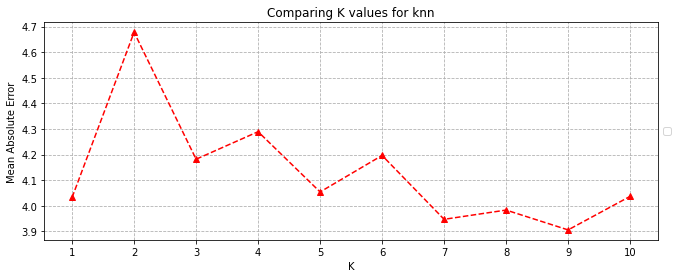

In [18]:
# Plotting the MAE values against k, the num of neighbors

Ks=list(range(1, 11))
plt.figure(figsize=(11,4))
plt.plot(Ks, MAE, 'r^--')
plt.xlabel('K')
plt.ylabel('Mean Absolute Error')
plt.title('Comparing K values for knn')
plt.grid(linestyle='--')
plt.xticks(Ks)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

K=1 and K=5 have the least mean absolute error values.

****
Use the "recommend" function to generate and display the top 3 joke recommendations for at least tw0 users using k=20 as the number of neighbors and Pearson similarity measure. You should display the predicted rating as well as the text of the recommended jokes in each case.

In [19]:
user = 379
N = 3
k = 20
preds, items = recommend(user,jokeDF,k,N,metric=pearsonSim)
print("Recommendations for User", user, ":")
for i in range(len(items)):
    print("Joke ",items[i], ":", "Predicted rating: ",preds[i],"\n",jokes.iloc[items[i],0],"\n")

Recommendations for User 379 :
Joke  99 : Predicted rating:  17.691784857210116 
 Q: What's the difference between greeting a Queen and greeting thePresident of the United  States?A: You only have to get on one knee to greet the queen. 

Joke  3 : Predicted rating:  16.839401884819257 
 Q. What's the difference between a man and a toilet? A. A toilet doesn't follow you around after you use it. 

Joke  90 : Predicted rating:  16.646270337147357 
 A Panda bear walks into a bar.  Sits down at a table and orders a beer and a double cheeseburger.  After he is finished eating he pulls out a gun and rips the place with gunfire.  Patrons scatter and dive under chairs and tables as the bear runs out the door.  After ensuring that no one is hurt the bartender races out the door and calls after the bear "What the hell did you do that for?"  The bear calls back "I'm a Panda bear.  Look it up in the dictionary."  The bartender returns pulls out his dictionary.panda : \Pan"da\ n. (Zo["o]l.)A small A

In [20]:
user = 100
N = 3
k = 20
preds, items = recommend(user,jokeDF,k,N,metric=pearsonSim)
print("Recommendations for User", user, ":")
for i in range(len(items)):
    print("Joke ",items[i], ":", "Predicted rating: ",preds[i],"\n",jokes.iloc[items[i],0],"\n")

Recommendations for User 100 :
Joke  82 : Predicted rating:  17.69285169368173 
 What a woman says:"This place is a mess!  C'monYou and I need to clean upYour stuff is lying on the floor and you'll have no clothes to wear if we don't do laundry right now!"What a man hears:blah blah blah blah C'mon blah blah blah blah you and I blah blah blah blah on the floor blah blah blah blah no clothes blah blah blah blah RIGHT NOW! 

Joke  89 : Predicted rating:  17.027572679843818 
 Q: How many programmers does it take to change a lightbulb?A: NONE!   That's a hardware problem.... 

Joke  78 : Predicted rating:  16.744520676853263 
 Q: Ever wonder why the IRS calls it Form 1040?A: Because for every $50 that you earn you get 10 and they get 40. 



-----------
### b
Write a function "user_sim_matrix" that takes the ratings matrix and a similarity metric as input and returns a user-user similarity matrix (be sure to test your function with a small toy data set, such as this one, before testing on the full joke ratings matrix). Note: your pairwise similarities should be computed only on overlapping items between two users (items they have both rated). Then, modify the "knn_predict" function takes as input the pre-computed user similarity matrix (instead of calling "knn_search"), along with the ratings matrix, that target user, the target item, and the number of neighbors (k); and return the predicted rating as before. Test your new predict functions on several user-item pairs and with k=30 to demonstrate that it works (user Pearson similarity when computing similarity matrix).

In [21]:
def user_sim_matrix(ratingsMat, metric):
    sims = np.array([metric(ratingsMat[i,:], ratingsMat[j,:])\
                     for i in range(0,len(ratingsMat)) for j in range(0,len(ratingsMat))])
    return sims

In [22]:
user_sim_matrix(jokeMat,metric=pearsonSim)

array([1.        , 0.39034552, 0.69868173, ..., 0.88461888, 0.58843177,
       1.        ])

In [23]:
small_toy = pd.read_csv("test-matrix.csv",header=None)
small_toy

,0,1,2,3,4
0,0,5,1,1,1
1,1,5,5,0,2
2,2,3,0,3,2
3,1,0,1,5,1
4,5,1,0,1,5


In [24]:
small_toy_mat = np.array(small_toy)
small_toy_mat

array([[0, 5, 1, 1, 1],
       [1, 5, 5, 0, 2],
       [2, 3, 0, 3, 2],
       [1, 0, 1, 5, 1],
       [5, 1, 0, 1, 5]], dtype=int64)

In [25]:
user_sim_matrix(small_toy_mat,metric=cosineSim)

array([1.        , 0.81543551, 0.74124932, 0.25      , 0.28827833,
       0.81543551, 1.        , 0.55533018, 0.20385888, 0.3739788 ,
       0.74124932, 0.55533018, 1.        , 0.70418685, 0.70710678,
       0.25      , 0.20385888, 0.70418685, 1.        , 0.39310681,
       0.28827833, 0.3739788 , 0.70710678, 0.39310681, 1.        ])

 Then, modify the "knn_predict" function takes as input the pre-computed user similarity matrix (instead of calling "knn_search"), along with the ratings matrix, that target user, the target item, and the number of neighbors (k); and return the predicted rating as before. Test your new predict functions on several user-item pairs and with k=30 to demonstrate that it works (user Pearson similarity when computing similarity matrix).

In [26]:
user_similarity = user_sim_matrix(jokeMat,metric=pearsonSim)


In [27]:
def knn_modified(user, item, RatingsMat,user_sim, K, metric=pearsonSim):
    neigh_ratings = RatingsMat[user][:,item]
    neigh_sims = user_sim[user]
    wr = 0
    sum_sim=0
    for i in range(K):
        if (neigh_ratings[i] >0) & (neigh_sims[i] > 0):
            wr += neigh_ratings[i] * neigh_sims[i]
            sum_sim += neigh_sims[i]
    if sum_sim > 0:
        predicted_rating = wr/sum_sim
    else:
        item_vec = RatingsMat[:,item]
        predicted_rating = (RatingsMat[:,item][item_vec > 0]).mean()
    return predicted_rating            

In [29]:
item = 0
user = jokeMat[1]
K=20
modified = knn_modified(user, item, jokeMat,user_similarity, K, metric=pearsonSim)

In [30]:
print("\nPredicted Rating for User:", user, "on item ", jokeDF.columns[item],":")
print(modified)


Predicted Rating for User: [15 10 17 15  8  1 10  5 19 20 17 19 15 18 15 10 15 10 14  9 11 19 19 20
 11 18 15 11 10 17 17 10 18 20  9 11 18 14 10 18 18  7 19 19  6  7  6 10
  9 14 14 20 11  9  4  7 19  8 11 20  4  7  1 15 15  7 19 12 11 18  6 13
 19 18 18 17 18 19 19 19 14 15 15 17 19 15 10 14 15 11 13  6 10 18 10  8
 14 11  6 12] on item  0 :
9.732689021330238


-----
Next, create your own version of an item-based KNN recommender. You can modify the user-based prediction function from the previous part that instead uses and item-item similarity matrix (you'll also need to create a new version of the function for the similarity matrix that compute pairwise similarities among items). The predicted ratings would be computed as the weighted average of the ratings of item neighbors to the target item that have been rated by the target user (be sure to review class notes describing item-based KNN model). Test your item-based predict function as in part b, but this time use Cosine similarity for computing item-item similarity matrix.

In [31]:
def most_similar_items(mat,metric=cosineSim):
    sims = []
    for i in range(len(mat)):
        for j in range(i, len(mat)):
            if i==j:
                continue
            simMeas = metric(mat[i], mat[j])
            user = (simMeas, i, j)
            sims.append(user)
    sims.sort(reverse=True)
    return sims

In [32]:
item_mat = jokeMat.T

In [33]:
def prediction(user, joke, k, sims):
    simsMat = [sims[i] for i in range(len(sims)) if sims[i][1] == joke or sims[i][2]==joke][:k]
    top_jokes = []
    for i in range(len(simsMat)):
        if simsMat[i][1] != joke:
            top_jokes.append(simsMat[i][1])
        else:
            top_jokes.append(simsMat[i][2])
    rates = []
    for r in top_jokes:
        rate = jokeDF[user][r]
        if rate != 0:
            rates.append(rate)
    return np.mean(rates)

In [34]:
User = 0
Joke = 0
K = 20
msi = most_similar_items(item_mat)
predict_user = prediction(User, Joke, K, msi)
print("user {} for joke {} predicted: {}".format(User, Joke, predict_user))

user 0 for joke 0 predicted: 10.8125


-----
Modify the "cross_validate_user" and the "test" functions to use the new item-based predict function from the previous part. Note that the only modification that should be necessary are changing the signature of these functions (to take a similarity matrix as input instead of a similarity metric) and the call to "knn_predict" (in "cross_validate_user") and the call to "cross_validate_user" (in "test"). The rest of the code should not need modification. Test your "test" function as in part (a) to make sure it works. Then, run the test on the full ratings matrix with 0.2 test ratio for values of k from 1 to 40. Note: this should be much faster than the (much smaller) test you ran in part (a) since the predict function need not compute similarities on the fly and instead uses pre-computed similarity matrix that is computed prior to running the "test" function. Here is an example of what your final output might look like.

In [41]:
def cross_validate(dataMat, user, test_ratio, K, sims):
    number_of_items = np.shape(dataMat)[1]
    rated_items_by_user = np.array([i for i in range(number_of_items) if dataMat[user,i]>0])
    test_size = int(test_ratio * len(rated_items_by_user))
    test_indices = np.random.randint(0, len(rated_items_by_user), test_size)
    withheld_items = rated_items_by_user[test_indices]
    original_user_profile = np.copy(dataMat[user]) # maintain the original ratings to be restored later
    dataMat[user, withheld_items] = 0 # So that the withheld test items is not used in the rating prediction below
    error_u = 0.0
    count_u = len(withheld_items)

    # Compute absolute error for user u over all test items
    for item in withheld_items:
        # Estimate rating on the withheld item
        u = dataMat[user]
        # print("user: ", u, "Item: ", i)
        predicted_rating = prediction(user, Joke, K, sims)
        error_u = error_u + abs(predicted_rating - original_user_profile[item])
    
    # Now restore ratings of the withheld items to the user profile
    for item in withheld_items:
        dataMat[user, item] = original_user_profile[item]
    
    # Return sum of absolute errors and the count of test cases for this user
    # Note that these will have to be accumulated for each user to compute MAE
    return error_u, count_u

In [42]:
def testing(dataMat, num_test_users, test_ratio, K, sims):
    
    """ This function performs cross_validate_user on the first num_test_users in the training data """
    """ It returns the Mean Absolute Error (MAE) across all test cases. """
	
    total_error=0.0;
    total_test_cases=0.0
    for u in range(num_test_users):
        error_u, count = cross_validate(dataMat, u , test_ratio, K, sims)
        # print('Evaluating user', u, ' out of', num_test_users, 'MAE: ', error_u/count)
        total_error=total_error+error_u
        total_test_cases=total_test_cases+count
    print('Mean Absoloute Error for K =',K,' : ', total_error/total_test_cases)
    return(total_error/total_test_cases)

In [43]:
MAE = np.array([])
# to keep computed MAE values for each value of k
for k in range(1, 40):
    print("K = ", k)
    num_test_users = 50 #50 users
    test_ratio = 0.2  # ratio of rated items for each user used in testing
    error = testing(jokeMat, num_test_users, test_ratio, k, msi)
    MAE = np.append(MAE,[error])

K =  1
Mean Absoloute Error for K = 1  :  5.607843137254902
K =  2
Mean Absoloute Error for K = 2  :  5.217086834733894
K =  3
Mean Absoloute Error for K = 3  :  4.7896825396825395
K =  4
Mean Absoloute Error for K = 4  :  4.545401493930905
K =  5
Mean Absoloute Error for K = 5  :  4.480812324929971
K =  6
Mean Absoloute Error for K = 6  :  4.284593837535014
K =  7
Mean Absoloute Error for K = 7  :  4.230012004801921
K =  8
Mean Absoloute Error for K = 8  :  4.4033846872082165
K =  9
Mean Absoloute Error for K = 9  :  4.304555155395491
K =  10
Mean Absoloute Error for K = 10  :  4.230483304432884
K =  11
Mean Absoloute Error for K = 11  :  4.314259895877542
K =  12
Mean Absoloute Error for K = 12  :  4.43642108358495
K =  13
Mean Absoloute Error for K = 13  :  4.112842728388946
K =  14
Mean Absoloute Error for K = 14  :  4.2564664871387565
K =  15
Mean Absoloute Error for K = 15  :  4.097549120658364
K =  16
Mean Absoloute Error for K = 16  :  4.204372028531693
K =  17
Mean Absoloute E

No handles with labels found to put in legend.


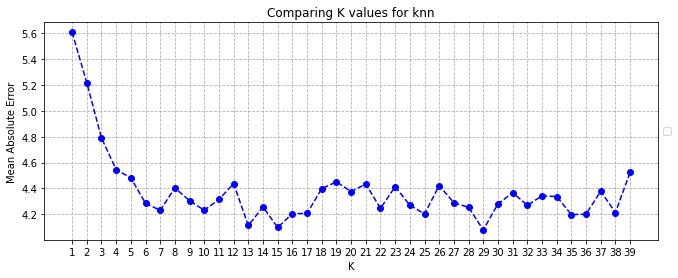

In [44]:
# Plotting the MAE values against k, the num of neighbors

Ks=list(range(1, 40))
plt.figure(figsize=(11,4))
plt.plot(Ks, MAE, 'bo--')
plt.xlabel('K')
plt.ylabel('Mean Absolute Error')
plt.title('Comparing K values for knn')
plt.grid(linestyle='--')
plt.xticks(Ks)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

 Use the best k value (the one resulting in lowest MAE) from part (d) to generate top 3 recommendations for at least two users. Note that you'll need a slightly modified "recommend" function that would use the similarity matrix and would call your new item-based "predict" function. Again, here is an example of a call to the item-based recommend function and the possible output.

In [45]:
#k with 15 is the smallest in this case
def mod_recommend(dataMat, simMat,user, k, N):
    unratedItems = np.nonzero(np.matrix(dataMat[user,:]).A==0)[1]
    if len(unratedItems) == 0: return 'you rated everything'
    itemScores = []
    for item in unratedItems:
        estimatedScore = prediction(user, item, k, simMat)
        itemScores.append((item, estimatedScore))
    
    return sorted(itemScores, key=lambda jj: jj[1], reverse=True)[:N]    

In [46]:
def get_joke_text(jokes, id):
    return jokes.iloc[id][0]

In [47]:
get_joke_text(jokes, 3)

"Q. What's the difference between a man and a toilet? A. A toilet doesn't follow you around after you use it."

In [48]:
user_index = [2,4]
N = 3
k = 15
for u_user in user_index:
    recommendations =mod_recommend(jokeMat,msi,u_user, k, N)
    print('Top {} recommended jokes for user {}:\n'.format(N, u_user))
    for r in recommendations:
        print('Joke # {}, predicted rating: {}'.format(r[0], r[1]))
        print(get_joke_text(jokes, r[0]),"\n")
    print(20*"=")


Top 3 recommended jokes for user 2:

Joke # 58, predicted rating: 15.333333333333334
The Chukcha (Russian Eskimo) phones up the Russian Parliament Building.  A guard answers. Chukcha:  "What is required to become Parliament member?"Guard:  "What are you an idiot?"Chukcha:  "Is it required?" 

Joke # 0, predicted rating: 14.375
A man visits the doctor. The doctor says "I have bad news for you.You have cancer and Alzheimer's disease". The man replies "Well thank God I don't have cancer!" 

Joke # 21, predicted rating: 13.88888888888889
A duck walks into a pharmacy and asks for a condom. The pharmacist says"Would you like me to stick that on your bill?"The duck says: "What kind of duck do you think I am!" 

Top 3 recommended jokes for user 4:

Joke # 75, predicted rating: 11.666666666666666
There once was a man and a woman that both  got in  a terrible car wreck. Both of their vehicles  were completely destroyed buy fortunately no one  was   hurt.  In thankfulness the woman said to the ma

----
One way to use item-item similarities for a "localized" version of recommendation is to generate "similar" items  to a given target item. Note that this is not personalized (does not use all of user's past ratings), but it can be used to generate Amazon-like "people who like this item also liked ..." recommendation for an item purchased or selected by the user. For this part, write a function that take an item (column index in the joke ratings matrix as before) and the pre-computed similarity matrix as inputs, and generates top N recommended jokes based on their similarities to the input query joke. Test your function for at least two different items and with N=3 as the number of recommendations (as before use the Cosine-based similarity matric). In the output, provide the text of the query joke as well as the text of the N most similar jokes given as recommendations along with their similarity values to the query joke.

In [49]:
def most_similar_jokes(dataMat, jokes, queryJoke, k, metric=cosineSim):
    jokes_transpose = dataMat.T
    sims =[]
    for i in range(len(jokes_transpose)):
        if (i==queryJoke):
            continue;
        sim = metric(jokes_transpose[queryJoke], jokes_transpose[i])
        sims.append((sim,i))
    sims.sort(reverse = True)
    print("top {} most similar jokes to {}:\n\n{}".format(k,queryJoke,jokes.iloc[queryJoke][0]))
    for i in range(k):
        joke=sims[i]
        print("\nJoke {}, similarity {:0.6f}:".format(i+1,joke[0]))
        print(jokes.iloc[joke[1]][0])
    return

In [50]:
most_similar_jokes(jokeDF, jokes, 5, 5)

top 5 most similar jokes to 5:

Bill & Hillary are on a trip back to Arkansas. They're almost out of gas so Bill pulls into a service station on the outskirts of town. The attendant runs out of the station to serve them when Hillary realizes it's an old boyfriend from high school. She and the attendant chat as he gases up their car and cleans the windows. Then they all say good-bye. As Bill pulls the car onto the road he turns to Hillary and says 'Now aren't you glad you married me and not him ? You could've been the wife of a grease monkey !' To which Hillary replied 'No Bill. If I would have married him you'd be pumping gas and he would be the President !' 

Joke 1, similarity 0.886979:
A guy stood over his tee shot for what seemed an eternity looking up looking down measuring the distance figuring the wind direction and speed. Driving his partner nuts.Finally his exasperated partner says "What the hell is taking so long? Hit the goddamn ball!"The guy answers "My wife is up there wat

------
### Part 2. [20 pts] More Exploration of the Scikit Surpise Package for Recommendation

[5 pts] For this part, you'll use the Surpise package with the joke ratings data set. Note that the data set used in part 1 is not in the correct (sparse) format used by Surprise. First, you need to convert this data into a dataframe with each row corresponding to a rating by a user on an item (with columns: "user_id", "joke_id", and "rating". See the example Jupyter Notebook linked above for an illustration. Be sure that the id fields and the rating field are of integer data type. As in previous assignment, you can use the Dataset.load_from_df function to load this data into Surprise.

In [51]:
from surprise import Dataset
from surprise import Reader

In [52]:
from surprise import SVD, KNNWithMeans, SlopeOne
from surprise.model_selection import cross_validate

In [53]:
jokeIds = {}
userIds = {}
jid = 0
uid = 0

for i in jokeDF.columns:
    jokeIds[i] = jid
    jid += 1
for u in jokeDF.index:
    userIds[u] = uid
    uid += 1
    

In [54]:
ratings = pd.DataFrame([], columns = ['user_id', 'joke_id', 'rating'], dtype = int)

for u in jokeDF.index:
    for i in jokeDF.columns:
        if jokeDF[i][u] > 0:
            new_rating = {'user_id':userIds[u], 'joke_id':jokeIds[i], 'rating':int(jokeDF[i][u])}
            ratings = ratings.append(new_rating, ignore_index = True)
ratings.head()

,user_id,joke_id,rating
0,0,0,3
1,0,1,19
2,0,2,1
3,0,3,2
4,0,4,3


In [55]:
reader = Reader(rating_scale=(1, 20))
rateData = Dataset.load_from_df(ratings[['user_id', 'joke_id', 'rating']], reader)

Compare mean cross-validation MAEs for the following algorithms (using cross_validate function from surprise.model_selection):

SlopeOne

KNNWithMeans (user-based, with pearson similarity, and k=30)

KNNWithMeans (item-based, with cosine similarity, and k=20)

SVD (with n_factors=10)

Note that for KNNWIthMeans, you'll need to specify the "sim_options" parameter. Use a bar chart to compare cross-validation MAEs for these algorithms. Please review the documentation for these algorithms on the Suprise Web site.

In [56]:
#SlopeOne

alg1 = SlopeOne()
cv_results_slope = cross_validate(alg1, rateData, measures = ['RMSE', 'MAE'], cv =5, verbose = True)

Evaluating RMSE, MAE of algorithm SlopeOne on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    4.3459  4.3738  4.3609  4.3967  4.3469  4.3649  0.0189  
MAE (testset)     3.4501  3.4759  3.4511  3.4730  3.4591  3.4618  0.0108  
Fit time          0.10    0.12    0.11    0.12    0.12    0.12    0.01    
Test time         0.54    0.55    0.54    0.62    0.59    0.57    0.03    


In [57]:
#KNN userbased

sim_options = {
    "name": "pearson",
    "user_based": True,  # Compute  similarities between users
}

alg2 = KNNWithMeans(k=30, sim_options=sim_options)

In [58]:
cv_results_userknn = cross_validate(alg2, rateData, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    4.2451  4.2557  4.2313  4.2361  4.2862  4.2509  0.0195  
MAE (testset)     3.3405  3.3667  3.3340  3.3407  3.3767  3.3517  0.0168  
Fit time          4.05    4.09    4.08    4.07    4.06    4.07    0.01    
Test time         6.13    5.51    5.54    5.44    5.45    5.61    0.26    


In [59]:
#KNN item based
sim_options = {
    "name": "cosine",
    "user_based": False,  # Compute  similarities between items
}
alg3 = KNNWithMeans(k=20, sim_options=sim_options)

In [60]:
cv_results_itemknn = cross_validate(alg3, rateData, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    4.3073  4.3075  4.3512  4.3041  4.3030  4.3146  0.0184  
MAE (testset)     3.3714  3.3765  3.3996  3.3767  3.3858  3.3820  0.0099  
Fit time          0.27    0.29    0.31    0.32    0.32    0.30    0.02    
Test time         0.98    0.97    1.07    1.02    1.05    1.02    0.04    


In [61]:
# SVD 
alg4 = SVD(n_factors = 10)
cv_results_SVD = cross_validate(alg4, rateData, measures = ['RMSE', 'MAE'], cv =5, verbose = True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    4.3808  4.3603  4.3575  4.3509  4.4187  4.3736  0.0246  
MAE (testset)     3.3388  3.3376  3.3344  3.3401  3.3774  3.3457  0.0160  
Fit time          0.82    0.85    0.84    0.83    0.83    0.83    0.01    
Test time         0.07    0.17    0.07    0.07    0.07    0.09    0.04    


In [62]:
#only comparing MAE's of results
data_1 = cv_results_slope['test_mae'][0]
data_2 = cv_results_userknn['test_mae'][0]
data_3 = cv_results_itemknn['test_mae'][0]
data_4 = cv_results_SVD['test_mae'][0]

algorithms = ['SlopeOne', 'KNN-user', 'KNN-item', 'SVD']
data = [data_1, data_2, data_3, data_4]
data_rounded = [round(num, 4) for num in data]
#print(data)

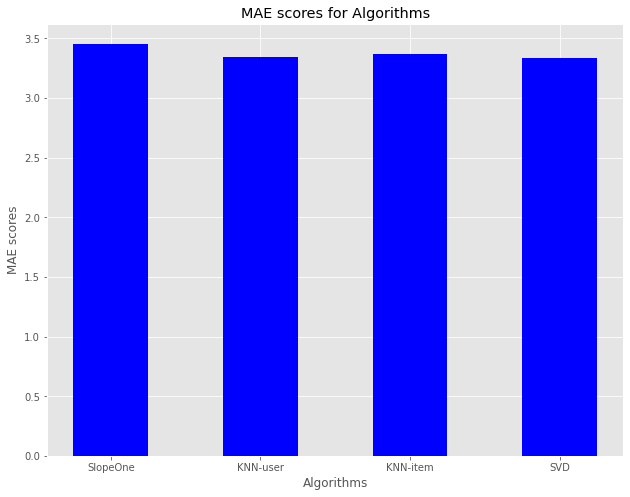

In [63]:
plt.style.use('ggplot')
fig = plt.figure(figsize =(8, 6)) 
  
# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1])
barp = ax.bar(algorithms, data_rounded,width = 0.5,color='blue')
plt.xlabel('Algorithms')
plt.ylabel('MAE scores')
plt.title('MAE scores for Algorithms')
plt.show()

It appears that mean absolute error is slightly lower in **SVD with 10 factors** than KNN user-based.

----------
Write a function or code segment to run an experiment to optimize the item-based version of KNNWithMeans (with Cosine as similarity) for k. First, use Surprise's (not Scikit-learn's) train_test_split function (from surprise.model_selection) with test_size=0.2 to split the data. Then perform cross-validation on the training portion multiple times for a range of values of k and record the mean MAE values. Plot the mean cross-validation MAE against the values of k (this should look similar to the graph in Part 1(d)). Finally, use the best k value to to compute the performance of KNNWithMeans on the test set predictions (using the "accuracy" module in Surprise).

In [64]:
#From the recent discussion post.All credits to the Professor

raw_ratings = rateData.raw_ratings #obtainraw ratings data from dataset

trainData = rateData  # initially make copies of the rateData
testData = rateData

# shuffle ratings if you want
np.random.shuffle(raw_ratings)

# 80% trainset, 20% testset
threshold = int(.8 * len(raw_ratings))
trainset_raw_ratings = raw_ratings[:threshold]
test_raw_ratings = raw_ratings[threshold:]

# now change the train and test Datasets to the new data
trainData.raw_ratings = trainset_raw_ratings
testData.raw_ratings = test_raw_ratings

In [70]:
sim_options = {
    'name':'cosine',
    'user_based':False,
}

MAE_item = []
for i in range(1,21):
    alg = KNNWithMeans(k=i, sim_options=sim_options)
    cross_val = cross_validate(alg, trainData, measures=['MAE'], cv=5, verbose = True)
    MAE_item.append(cross_val['test_mae'].mean())

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     4.3917  4.4437  4.4502  4.5722  4.4196  4.4555  0.0619  
Fit time          0.03    0.02    0.02    0.02    0.02    0.02    0.00    
Test time         0.04    0.03    0.03    0.03    0.03    0.03    0.00    
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity mat

Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     3.6269  3.5602  3.6207  3.6391  3.6063  3.6107  0.0274  
Fit time          0.02    0.02    0.02    0.02    0.02    0.02    0.00    
Test time         0.07    0.07    0.07    0.07    0.07    0.07    0.00    
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     3.6

No handles with labels found to put in legend.


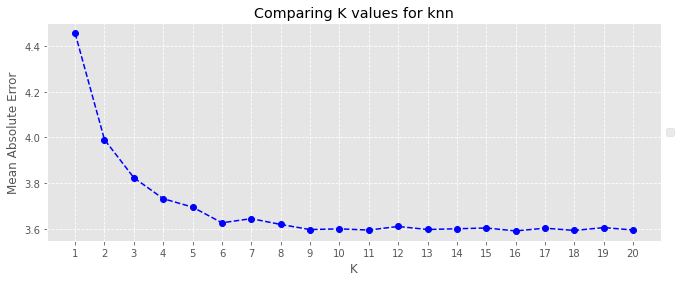

In [71]:
# Plotting the MAE values against k, the num of neighbors

Ks=list(range(1, 21))
plt.figure(figsize=(11,4))
plt.plot(Ks, MAE_item, 'bo--')
plt.xlabel('K')
plt.ylabel('Mean Absolute Error')
plt.title('Comparing K values for knn')
plt.grid(linestyle='--')
plt.xticks(Ks)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

Finally, use the best k value to to compute the performance of KNNWithMeans on the test set predictions (using the "accuracy" module in Surprise).

In [1]:
sim_options = {
    'name':'cosine',
    'user_based':False,
}

#K-9
alg_best = KNNWithMeans(k=9, sim_options=sim_options)

NameError: name 'KNNWithMeans' is not defined

In [73]:
trainset = trainData.build_full_trainset()
alg_best.fit(trainset) # suppose alg is the model created with the optimal k value

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [74]:
testset = testData.construct_testset(test_raw_ratings)                         
predictions = alg_best.test(testset)                                           
print('Accuracy on the testset:')                                          
accuracy.rmse(predictions) 

Accuracy on the testset:
RMSE: 3.6180


3.618000485310184